## Importing Libraries

In [3]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [4]:
%%notify
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

<IPython.core.display.Javascript object>

In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing the Datasets

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Retail Price Project

16-02-2021  08:33    <DIR>          .
16-02-2021  08:33    <DIR>          ..
16-02-2021  08:33    <DIR>          .ipynb_checkpoints
16-02-2021  08:32            40,881 Cafe - DateInfo.csv
16-02-2021  08:32               257 Cafe - Sell Meta Data.csv
16-02-2021  08:32           135,465 Cafe - Transaction - Store.csv
16-02-2021  08:33                72 Retail_Price_Prediction.ipynb
               4 File(s)        176,675 bytes
               3 Dir(s)  174,867,251,200 bytes free


In [5]:
data1 = pd.read_csv('Cafe - DateInfo.csv')
data1.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [6]:
data2 = pd.read_csv('Cafe - Sell Meta Data.csv')
data2.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

In [7]:
data3 = pd.read_csv('Cafe - Transaction - Store.csv')
data3.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


Important: It’s supposed the PRICE for that product in that day will not vary.

In details: 

CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

## Understanding the data

In [21]:
data1.shape
data2.shape
data3.shape

(1349, 7)

(11, 4)

(5404, 5)

In [24]:
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              1349 non-null   object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SELL_ID        11 non-null     int64 
 1   SELL_CATEGORY  11 non-null     int64 
 2   ITEM_ID        11 non-null     int64 
 3   ITEM_NAME      11 non-null     object
dtypes: int64(3), obj

In [22]:
data1.describe()
data1.describe(include=['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,1349
unique,1348,9
top,3/1/13,No Holiday
freq,2,1244


In [25]:
data2.describe()
data2.describe(include=['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [26]:
data3.describe()
data3.describe(include=['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [18]:
data1.isnull().sum()
data2.isnull().sum()
data3.isnull().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64

CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64

In [8]:
data1['HOLIDAY'] = data1['HOLIDAY'].fillna("No Holiday")
data1

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
5,1/6/12,2012,No Holiday,0,0,23.0,0
6,1/7/12,2012,No Holiday,1,0,26.6,0
7,1/8/12,2012,No Holiday,1,0,26.6,0
8,1/9/12,2012,No Holiday,0,0,23.0,0
9,1/10/12,2012,No Holiday,0,0,24.8,0


In [20]:
data1.isnull().sum()

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

In [27]:
data1['HOLIDAY'].unique()

array(['New Year', 'No Holiday', 'Luner New Year', 'Qing Ming Festival',
       'Labor Day', 'Dragon Boat Festivel', 'Mid-Autumn Day',
       'National Day', 'WWII Celebration'], dtype=object)

In [29]:
data1['CALENDAR_DATE'].min()
data1['CALENDAR_DATE'].max()

'1/1/12'

'9/9/15'

In [30]:
data1['AVERAGE_TEMPERATURE'].min()
data1['AVERAGE_TEMPERATURE'].max()

14.0

87.8

In [31]:
data2['ITEM_NAME'].unique()

array(['BURGER', 'COFFEE', 'COKE', 'LEMONADE'], dtype=object)

In [32]:
data3['CALENDAR_DATE'].min()
data3['CALENDAR_DATE'].max()

'01/01/12'

'9/30/14'

In [33]:
data3['PRICE'].min()
data3['PRICE'].max()

10.12

16.5

In [34]:
data3['QUANTITY'].min()
data3['QUANTITY'].max()

8

124

## Understanding the data better by visualizing

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

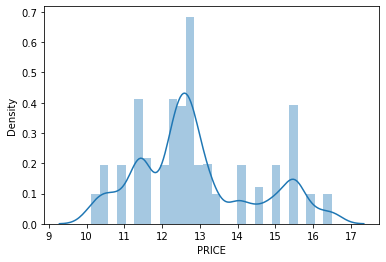

In [35]:
sns.distplot(data3.PRICE)

<AxesSubplot:xlabel='QUANTITY', ylabel='Density'>

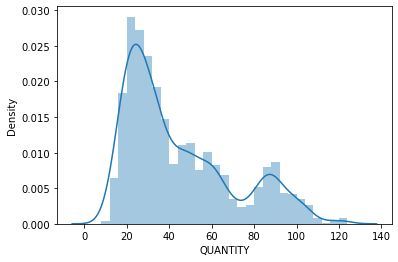

In [40]:
sns.distplot(data3.QUANTITY)

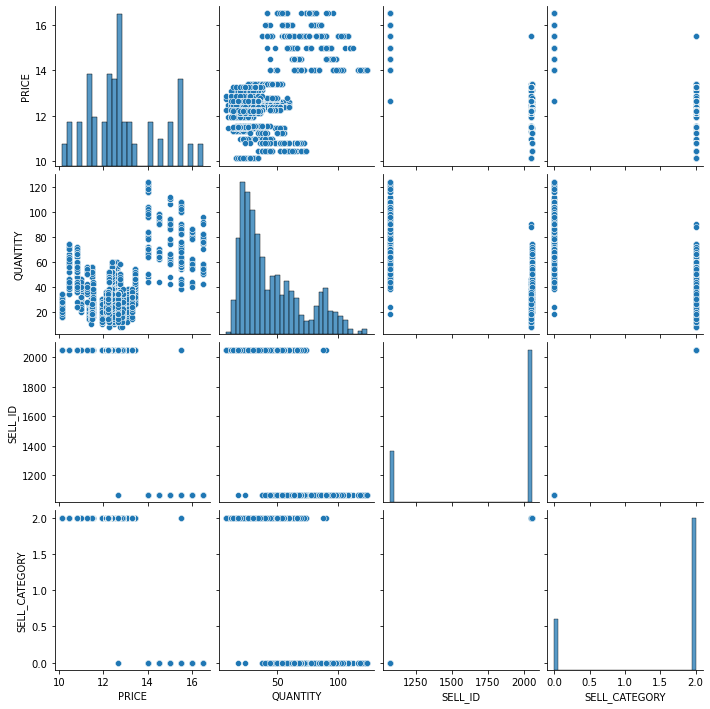

In [36]:
%%notify
sns.pairplot(data3)

<AxesSubplot:xlabel='ITEM_NAME', ylabel='count'>

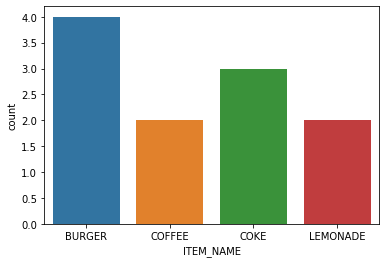

In [37]:
sns.countplot(data2['ITEM_NAME'])

<AxesSubplot:xlabel='YEAR', ylabel='count'>

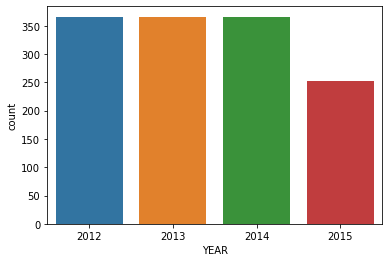

In [39]:
sns.countplot(data1['YEAR'])

<AxesSubplot:xlabel='count', ylabel='HOLIDAY'>

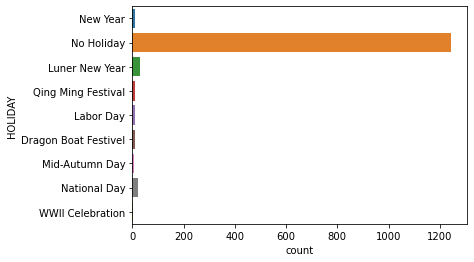

In [21]:
sns.countplot(y=data1['HOLIDAY'])

<AxesSubplot:xlabel='IS_WEEKEND', ylabel='count'>

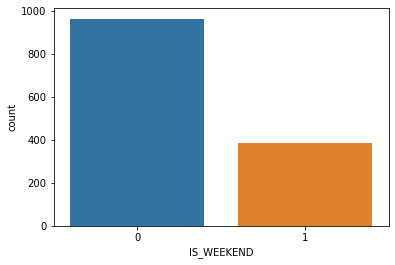

In [23]:
sns.countplot(data1['IS_WEEKEND'])

<AxesSubplot:xlabel='IS_SCHOOLBREAK', ylabel='count'>

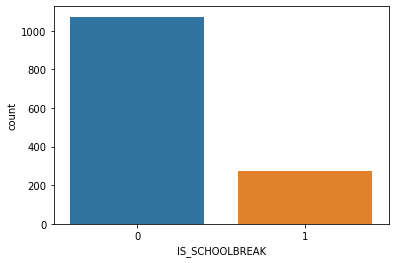

In [24]:
sns.countplot(data1['IS_SCHOOLBREAK'])

## Merging all the datasets

In [38]:
data1.columns
data2.columns
data3.columns

Index(['CALENDAR_DATE', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR'],
      dtype='object')

Index(['SELL_ID', 'SELL_CATEGORY', 'ITEM_ID', 'ITEM_NAME'], dtype='object')

Index(['CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID', 'SELL_CATEGORY'], dtype='object')

In [45]:
pd.concat([data2.SELL_ID, pd.get_dummies(data2.ITEM_NAME)], axis=1).groupby(data2.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [53]:
pd.DataFrame({'SELL_ID': ['1070', '2051', '2052', '2053', '3028', '3055', '3067'],
             'ITEMs': ['BURGER', 'BURGER+COKE', 'BURGER+LEMONADE', 'BURGER+COFFEE+COKE', 'LEMONADE', 'COFFEE', 'COKE']})

,SELL_ID,ITEMs
0,1070,BURGER
1,2051,BURGER+COKE
2,2052,BURGER+LEMONADE
3,2053,BURGER+COFFEE+COKE
4,3028,LEMONADE
5,3055,COFFEE
6,3067,COKE


In [64]:
pd.DataFrame({'ITEM_ID': ['7821', '5030', '6249', '3052'],
             'ITEM_NAME': ['BURGER', 'COKE', 'LEMONADE', 'COFFEE']})

,ITEM_ID,ITEM_NAME
0,7821,BURGER
1,5030,COKE
2,6249,LEMONADE
3,3052,COFFEE


In [9]:
# pd.merge(data2, data3, on='SELL_ID')
data23 = pd.merge(data2.drop(['ITEM_ID'], axis=1), data3.drop(['SELL_CATEGORY'], axis=1), on='SELL_ID')
data23.head(10)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [43]:
data23.shape

(10808, 6)

In [10]:
data123 = pd.merge(data1.drop(['YEAR'], axis=1), data23, on='CALENDAR_DATE')
data123.head(10)

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
0,1/13/12,No Holiday,0,0,26.6,0,1070,0,BURGER,15.50,100
1,1/13/12,No Holiday,0,0,26.6,0,2051,2,BURGER,12.73,40
2,1/13/12,No Holiday,0,0,26.6,0,2051,2,COKE,12.73,40
3,1/13/12,No Holiday,0,0,26.6,0,2052,2,BURGER,12.75,26
4,1/13/12,No Holiday,0,0,26.6,0,2052,2,LEMONADE,12.75,26
5,1/13/12,No Holiday,0,0,26.6,0,2053,2,BURGER,12.60,58
6,1/13/12,No Holiday,0,0,26.6,0,2053,2,COKE,12.60,58
7,1/13/12,No Holiday,0,0,26.6,0,2053,2,COFFEE,12.60,58
8,1/14/12,No Holiday,1,0,23.0,0,1070,0,BURGER,15.50,74
9,1/14/12,No Holiday,1,0,23.0,0,2051,2,BURGER,12.73,24


In [42]:
data123.shape

(6696, 11)

In [47]:
data1.shape[0]+data3.shape[0]+data3.shape[0]

12157

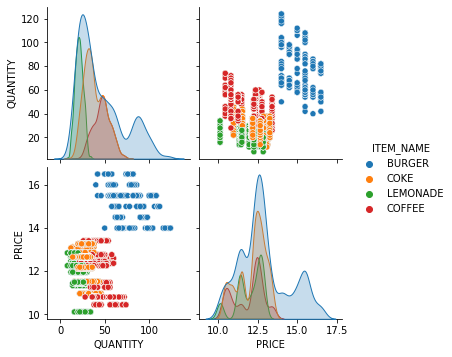

In [57]:
sns.pairplot(data123[['QUANTITY', 'PRICE', 'ITEM_NAME']], hue='ITEM_NAME')

In [11]:
# Lets check the data for working days only.
data = data123[(data123.HOLIDAY == 'No Holiday') &
               (data123.IS_WEEKEND == 0) &
               (data123.IS_SCHOOLBREAK == 0)]
data.drop(['HOLIDAY','IS_WEEKEND','IS_SCHOOLBREAK'], axis=1, inplace=True)
data.head(10)

,CALENDAR_DATE,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
0,1/13/12,26.6,0,1070,0,BURGER,15.50,100
1,1/13/12,26.6,0,2051,2,BURGER,12.73,40
2,1/13/12,26.6,0,2051,2,COKE,12.73,40
3,1/13/12,26.6,0,2052,2,BURGER,12.75,26
4,1/13/12,26.6,0,2052,2,LEMONADE,12.75,26
5,1/13/12,26.6,0,2053,2,BURGER,12.60,58
6,1/13/12,26.6,0,2053,2,COKE,12.60,58
7,1/13/12,26.6,0,2053,2,COFFEE,12.60,58
24,1/16/12,23.0,0,1070,0,BURGER,15.50,104
25,1/16/12,23.0,0,2051,2,BURGER,12.73,40


In [53]:
data.shape

(3768, 8)

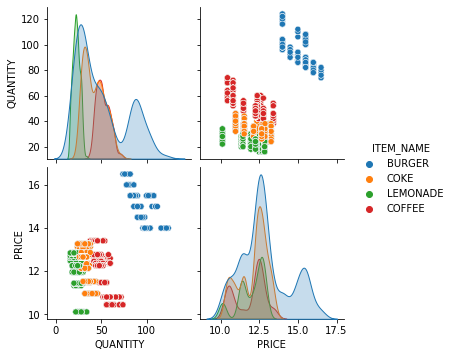

In [58]:
sns.pairplot(data[['QUANTITY', 'PRICE', 'ITEM_NAME']], hue='ITEM_NAME')

In [12]:
# Lets check the data for burger sales
burger = data123[data123['ITEM_NAME'] == 'BURGER']
burger.head(10)

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
0,1/13/12,No Holiday,0,0,26.6,0,1070,0,BURGER,15.50,100
1,1/13/12,No Holiday,0,0,26.6,0,2051,2,BURGER,12.73,40
3,1/13/12,No Holiday,0,0,26.6,0,2052,2,BURGER,12.75,26
5,1/13/12,No Holiday,0,0,26.6,0,2053,2,BURGER,12.60,58
8,1/14/12,No Holiday,1,0,23.0,0,1070,0,BURGER,15.50,74
9,1/14/12,No Holiday,1,0,23.0,0,2051,2,BURGER,12.73,24
11,1/14/12,No Holiday,1,0,23.0,0,2052,2,BURGER,12.75,20
13,1/14/12,No Holiday,1,0,23.0,0,2053,2,BURGER,12.60,42
16,1/15/12,No Holiday,1,0,32.0,1,1070,0,BURGER,15.50,60
17,1/15/12,No Holiday,1,0,32.0,1,2051,2,BURGER,12.73,22


In [61]:
burger.shape

(3348, 11)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

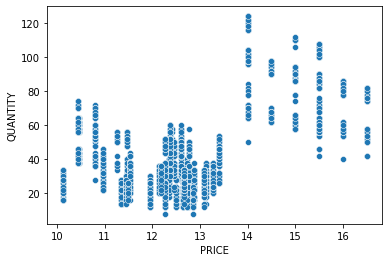

In [63]:
sns.scatterplot(x='PRICE', y='QUANTITY', data=burger)

In [68]:
burger.SELL_ID.unique()

array([1070, 2051, 2052, 2053], dtype=int64)

In [69]:
burger.SELL_CATEGORY.unique()

array([0, 2], dtype=int64)

In [13]:
# Lets check the data for burger sold alone
# burger_1070 = data123[(data123['ITEM_NAME'] == 'BURGER') & (data123['SELL_ID'] == 1070)]
burger_0 = data123[(data123['ITEM_NAME'] == 'BURGER') & (data123['SELL_CATEGORY'] == 0)]
burger_0.drop(['SELL_ID', 'SELL_CATEGORY'], axis=1, inplace=True)
burger_0.head(10)

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,ITEM_NAME,PRICE,QUANTITY
0,1/13/12,No Holiday,0,0,26.6,0,BURGER,15.5,100
8,1/14/12,No Holiday,1,0,23.0,0,BURGER,15.5,74
16,1/15/12,No Holiday,1,0,32.0,1,BURGER,15.5,60
24,1/16/12,No Holiday,0,0,23.0,0,BURGER,15.5,104
32,1/17/12,No Holiday,0,0,23.0,0,BURGER,15.5,106
40,1/18/12,No Holiday,0,0,23.0,0,BURGER,15.5,108
48,1/19/12,No Holiday,0,0,24.8,0,BURGER,15.5,100
56,1/20/12,No Holiday,0,0,26.6,0,BURGER,15.5,100
64,1/21/12,No Holiday,1,0,26.6,0,BURGER,15.5,70
72,1/22/12,No Holiday,1,0,24.8,0,BURGER,15.5,74


In [76]:
burger_0.shape

(837, 9)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

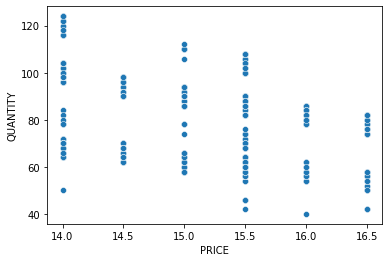

In [77]:
sns.scatterplot(x='PRICE', y='QUANTITY', data=burger_0)

## Modelling

In [14]:
# Model for all data
model_1 = ols("QUANTITY ~ PRICE", data=data123).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1589.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          4.69e-312
Time:                        10:13:37   Log-Likelihood:                -29209.
No. Observations:                6696   AIC:                         5.842e+04
Df Residuals:                    6694   BIC:                         5.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.9148      2.180    -21.065      0.000     -50.188     -41.642
PRICE          6.9367      0.174     39.867      0.000       6.596       7.278
==============================================================================
Omnibus:                      495.027   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.647
Skew:                           0.741   Prob(JB):                    9.24e-134
Kurtosis:                       3.040   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Price elasticity
model_1.params[1]

6.936686527589732

In [18]:
# Model for no holiday data
model_2 = ols("QUANTITY ~ PRICE", data=data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     982.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          9.05e-192
Time:                        10:18:53   Log-Likelihood:                -16603.
No. Observations:                3768   AIC:                         3.321e+04
Df Residuals:                    3766   BIC:                         3.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -49.2587      3.012    -16.353      0.000     -55.164     -43.353
PRICE          7.5515      0.241     31.338      0.000       7.079       8.024
==============================================================================
Omnibus:                      215.366   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.519
Skew:                           0.537   Prob(JB):                     4.31e-47
Kurtosis:                       2.546   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Price elasticity
model_2.params[1]

7.5514784496325005

In [20]:
# Model for all burger sale data
model_3 = ols("QUANTITY ~ PRICE", data=burger).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2152.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:19:19   Log-Likelihood:                -14794.
No. Observations:                3348   AIC:                         2.959e+04
Df Residuals:                    3346   BIC:                         2.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.3788      2.874    -30.403      0.000     -93.014     -81.744
PRICE         10.2930      0.222     46.391      0.000       9.858      10.728
==============================================================================
Omnibus:                      215.183   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.324
Skew:                           0.676   Prob(JB):                     1.33e-56
Kurtosis:                       2.879   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Price elasticity
model_3.params[1]

10.292983996551543

In [22]:
# Model for standalone burger sale data
model_4 = ols("QUANTITY ~ PRICE", data=burger_0).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.45e-32
Time:                        10:19:43   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.000     190.665     231.307
PRICE         -8.4660      0.682    -12.407      0.000      -9.805      -7.127
==============================================================================
Omnibus:                       42.869   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.664
Skew:                          -0.414   Prob(JB):                     2.97e-08
Kurtosis:                       2.446   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Price elasticity
model_4.params[1]

-8.466015765397277

In [24]:
# Model for all burger sale on weekday data
burger1 = data[data['ITEM_NAME'] == 'BURGER']
model_5 = ols("QUANTITY ~ PRICE", data=burger1).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1420.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          5.21e-232
Time:                        10:19:56   Log-Likelihood:                -8374.1
No. Observations:                1884   AIC:                         1.675e+04
Df Residuals:                    1882   BIC:                         1.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.0437      3.920    -24.758      0.000    -104.731     -89.356
PRICE         11.4265      0.303     37.681      0.000      10.832      12.021
==============================================================================
Omnibus:                       94.953   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.746
Skew:                           0.502   Prob(JB):                     4.40e-21
Kurtosis:                       2.569   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Price elasticity
model_5.params[1]

11.426533302679756

In [26]:
# Model for standalone burger sale on weekday data
burger_1070 = data[(data['ITEM_NAME'] == 'BURGER') & (data['SELL_ID'] == 1070)]
model_6 = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           7.16e-70
Time:                        10:20:07   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.000     219.550     245.888
PRICE         -9.3292      0.443    -21.077      0.000     -10.199      -8.459
==============================================================================
Omnibus:                      152.164   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.594
Skew:                           1.724   Prob(JB):                     1.81e-74
Kurtosis:                       5.326   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Price elasticity
model_6.params[1]

-9.329231941854609

In [28]:
# Model for standalone burger sale on weekday & outdoor data
burger2 = data123[(data123.HOLIDAY == 'No Holiday') &
                  (data123.IS_WEEKEND == 0) &
                  (data123.IS_SCHOOLBREAK == 0) &
                  (data123.IS_OUTDOOR == 1) &
                  (data123.ITEM_NAME == 'BURGER') &
                  (data123.SELL_ID == 1070) &
                  (data123.SELL_CATEGORY == 0)].reset_index()
burger2.drop(['index','HOLIDAY','IS_WEEKEND','IS_SCHOOLBREAK','IS_OUTDOOR','ITEM_NAME','SELL_ID','SELL_CATEGORY'], axis=1, inplace=True)
burger2.head(10)

,CALENDAR_DATE,AVERAGE_TEMPERATURE,PRICE,QUANTITY
0,1/27/12,32.0,15.5,86
1,1/31/12,32.0,15.5,84
2,2/13/12,32.0,15.5,90
3,2/14/12,32.0,15.5,82
4,2/15/12,32.0,15.5,86
5,2/16/12,32.0,15.5,86
6,2/17/12,32.0,15.5,84
7,2/20/12,37.4,15.5,88
8,2/21/12,39.2,15.5,90
9,2/22/12,39.2,15.5,90


In [31]:
burger2.shape

(416, 4)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

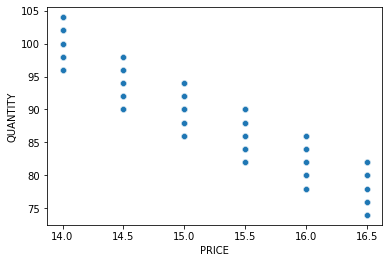

In [32]:
sns.scatterplot(x='PRICE', y='QUANTITY', data=burger2)

In [29]:
model_7 = ols("QUANTITY ~ PRICE", data=burger2).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          5.51e-153
Time:                        10:20:30   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.000     214.287     226.433
PRICE         -8.6586      0.204    -42.474      0.000      -9.059      -8.258
==============================================================================
Omnibus:                      281.738   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.687
Skew:                           0.012   Prob(JB):                     2.64e-06
Kurtosis:                       1.783   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Price elasticity
model_7.params[1]

-8.658581488470563

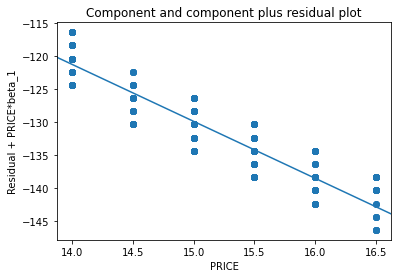

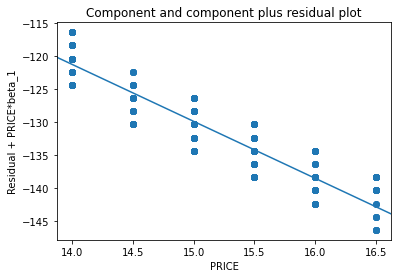

In [34]:
sm.graphics.plot_ccpr(model_7, "PRICE")

In [31]:
# Model for sale of burger with coke on weekdays/holidays data.
burger_2051 = data123[(data123['ITEM_NAME'] == 'BURGER') & (data123['SELL_ID'] == 2051)]
burger0_2051 = data[(data['ITEM_NAME'] == 'BURGER') & (data['SELL_ID'] == 2051)]
burger_2051.head()
burger0_2051.head()

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
1,1/13/12,No Holiday,0,0,26.6,0,2051,2,BURGER,12.73,40
9,1/14/12,No Holiday,1,0,23.0,0,2051,2,BURGER,12.73,24
17,1/15/12,No Holiday,1,0,32.0,1,2051,2,BURGER,12.73,22
25,1/16/12,No Holiday,0,0,23.0,0,2051,2,BURGER,12.73,40
33,1/17/12,No Holiday,0,0,23.0,0,2051,2,BURGER,12.73,38


,CALENDAR_DATE,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
1,1/13/12,26.6,0,2051,2,BURGER,12.73,40
25,1/16/12,23.0,0,2051,2,BURGER,12.73,40
33,1/17/12,23.0,0,2051,2,BURGER,12.73,38
41,1/18/12,23.0,0,2051,2,BURGER,12.73,40
49,1/19/12,24.8,0,2051,2,BURGER,12.73,32


In [32]:
model_8 = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           4.45e-27
Time:                        10:20:47   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.000      58.741      71.240
PRICE         -2.8697      0.257    -11.166      0.000      -3.374      -2.365
==============================================================================
Omnibus:                       24.502   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.439
Skew:                          -0.347   Prob(JB):                     1.34e-05
Kurtosis:                       2.599   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Price elasticity
model_8.params[1]

-2.8696901913270456

In [34]:
model_9 = ols("QUANTITY ~ PRICE", data=burger0_2051).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     238.9
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           7.43e-44
Time:                        10:21:20   Log-Likelihood:                -1252.5
No. Observations:                 471   AIC:                             2509.
Df Residuals:                     469   BIC:                             2517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.2801      2.657     27.579      0.000      68.059      78.501
PRICE         -3.3270      0.215    -15.457      0.000      -3.750      -2.904
==============================================================================
Omnibus:                       17.086   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.010
Skew:                           0.429   Prob(JB):                     0.000202
Kurtosis:                       2.637   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Price elasticity
model_9.params[1]

-3.327014593723698

In [36]:
# Model for sale of burger with lemonade on weekdays/holidays data.
burger_2052 = data123[(data123['ITEM_NAME'] == 'BURGER') & (data123['SELL_ID'] == 2052)]
burger0_2052 = data[(data['ITEM_NAME'] == 'BURGER') & (data['SELL_ID'] == 2052)]
burger_2052.head()
burger0_2052.head()

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
3,1/13/12,No Holiday,0,0,26.6,0,2052,2,BURGER,12.75,26
11,1/14/12,No Holiday,1,0,23.0,0,2052,2,BURGER,12.75,20
19,1/15/12,No Holiday,1,0,32.0,1,2052,2,BURGER,12.75,18
27,1/16/12,No Holiday,0,0,23.0,0,2052,2,BURGER,12.75,28
35,1/17/12,No Holiday,0,0,23.0,0,2052,2,BURGER,12.75,22


,CALENDAR_DATE,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
3,1/13/12,26.6,0,2052,2,BURGER,12.75,26
27,1/16/12,23.0,0,2052,2,BURGER,12.75,28
35,1/17/12,23.0,0,2052,2,BURGER,12.75,22
43,1/18/12,23.0,0,2052,2,BURGER,12.75,24
51,1/19/12,24.8,0,2052,2,BURGER,12.75,24


In [37]:
model_10 = ols("QUANTITY ~ PRICE", data=burger_2052).fit()
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           7.46e-46
Time:                        10:21:37   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.000      47.487      55.436
PRICE         -2.5508      0.169    -15.124      0.000      -2.882      -2.220
==============================================================================
Omnibus:                       11.783   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.425
Skew:                          -0.214   Prob(JB):                      0.00545
Kurtosis:                       2.659   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Price elasticity
model_10.params[1]

-2.5508282102594104

In [39]:
model_11 = ols("QUANTITY ~ PRICE", data=burger0_2052).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     295.8
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           9.28e-52
Time:                        10:21:47   Log-Likelihood:                -1188.2
No. Observations:                 471   AIC:                             2380.
Df Residuals:                     469   BIC:                             2389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.5156      1.984     28.488      0.000      52.617      60.414
PRICE         -2.8440      0.165    -17.199      0.000      -3.169      -2.519
==============================================================================
Omnibus:                       31.952   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.916
Skew:                           0.140   Prob(JB):                      0.00157
Kurtosis:                       2.239   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Price elasticity
model_11.params[1]

-2.8439761698808823

In [41]:
# Model for sale of burger with coffee & coke on weekdays/holidays data.
burger_2053 = data123[(data123['ITEM_NAME'] == 'BURGER') & (data123['SELL_ID'] == 2053)]
burger0_2053 = data[(data['ITEM_NAME'] == 'BURGER') & (data['SELL_ID'] == 2053)]
burger_2053.head()
burger0_2053.head()

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
5,1/13/12,No Holiday,0,0,26.6,0,2053,2,BURGER,12.6,58
13,1/14/12,No Holiday,1,0,23.0,0,2053,2,BURGER,12.6,42
21,1/15/12,No Holiday,1,0,32.0,1,2053,2,BURGER,12.6,32
29,1/16/12,No Holiday,0,0,23.0,0,2053,2,BURGER,12.6,56
37,1/17/12,No Holiday,0,0,23.0,0,2053,2,BURGER,12.6,54


,CALENDAR_DATE,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
5,1/13/12,26.6,0,2053,2,BURGER,12.6,58
29,1/16/12,23.0,0,2053,2,BURGER,12.6,56
37,1/17/12,23.0,0,2053,2,BURGER,12.6,54
45,1/18/12,23.0,0,2053,2,BURGER,12.6,58
53,1/19/12,24.8,0,2053,2,BURGER,12.6,54


In [42]:
model_12 = ols("QUANTITY ~ PRICE", data=burger_2053).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           6.20e-62
Time:                        10:22:03   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.000     105.803     120.220
PRICE         -5.5476      0.307    -18.084      0.000      -6.150      -4.945
==============================================================================
Omnibus:                       42.439   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.502
Skew:                          -0.463   Prob(JB):                     4.36e-09
Kurtosis:                       2.505   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Price elasticity
model_12.params[1]

-5.547610244996726

In [44]:
model_13 = ols("QUANTITY ~ PRICE", data=burger0_2053).fit()
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     929.6
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          2.38e-113
Time:                        10:22:53   Log-Likelihood:                -1348.7
No. Observations:                 471   AIC:                             2701.
Df Residuals:                     469   BIC:                             2710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.8547      2.402     51.981      0.000     120.135     129.575
PRICE         -6.1298      0.201    -30.490      0.000      -6.525      -5.735
==============================================================================
Omnibus:                       52.384   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.323
Skew:                           0.861   Prob(JB):                     2.40e-15
Kurtosis:                       3.683   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Price elasticity
model_13.params[1]

-6.129820976356093

In [46]:
# Model for sale of coke on weekdays/holidays data.
coke = data123[(data123['ITEM_NAME'] == 'COKE')]
coke.head()

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
2,1/13/12,No Holiday,0,0,26.6,0,2051,2,COKE,12.73,40
6,1/13/12,No Holiday,0,0,26.6,0,2053,2,COKE,12.60,58
10,1/14/12,No Holiday,1,0,23.0,0,2051,2,COKE,12.73,24
14,1/14/12,No Holiday,1,0,23.0,0,2053,2,COKE,12.60,42
18,1/15/12,No Holiday,1,0,32.0,1,2051,2,COKE,12.73,22


In [47]:
model_14 = ols("QUANTITY ~ PRICE", data=coke).fit()
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.94e-104
Time:                        10:23:21   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.000     113.205     127.023
PRICE         -6.7452      0.289    -23.329      0.000      -7.312      -6.178
==============================================================================
Omnibus:                      122.436   Durbin-Watson:                   2.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.133
Skew:                           0.154   Prob(JB):                     5.82e-11
Kurtosis:                       2.238   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Price elasticity
model_14.params[1]

-6.745224661560959

In [50]:
# Model for sale of lemonade on weekdays/holidays data.
lemonade = data123[(data123['ITEM_NAME'] == 'LEMONADE')]
lemonade.head()

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
4,1/13/12,No Holiday,0,0,26.6,0,2052,2,LEMONADE,12.75,26
12,1/14/12,No Holiday,1,0,23.0,0,2052,2,LEMONADE,12.75,20
20,1/15/12,No Holiday,1,0,32.0,1,2052,2,LEMONADE,12.75,18
28,1/16/12,No Holiday,0,0,23.0,0,2052,2,LEMONADE,12.75,28
36,1/17/12,No Holiday,0,0,23.0,0,2052,2,LEMONADE,12.75,22


In [51]:
model_15 = ols("QUANTITY ~ PRICE", data=lemonade).fit()
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           7.46e-46
Time:                        10:23:46   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.000      47.487      55.436
PRICE         -2.5508      0.169    -15.124      0.000      -2.882      -2.220
==============================================================================
Omnibus:                       11.783   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.425
Skew:                          -0.214   Prob(JB):                      0.00545
Kurtosis:                       2.659   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Price elasticity
model_15.params[1]

-2.5508282102594104

In [53]:
# Model for sale of coffee on weekdays/holidays data.
coffee = data123[(data123['ITEM_NAME'] == 'COFFEE')]
coffee.head()

,CALENDAR_DATE,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY
7,1/13/12,No Holiday,0,0,26.6,0,2053,2,COFFEE,12.6,58
15,1/14/12,No Holiday,1,0,23.0,0,2053,2,COFFEE,12.6,42
23,1/15/12,No Holiday,1,0,32.0,1,2053,2,COFFEE,12.6,32
31,1/16/12,No Holiday,0,0,23.0,0,2053,2,COFFEE,12.6,56
39,1/17/12,No Holiday,0,0,23.0,0,2053,2,COFFEE,12.6,54


In [54]:
model_16 = ols("QUANTITY ~ PRICE", data=coffee).fit()
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           6.20e-62
Time:                        10:24:17   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.000     105.803     120.220
PRICE         -5.5476      0.307    -18.084      0.000      -6.150      -4.945
==============================================================================
Omnibus:                       42.439   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.502
Skew:                          -0.463   Prob(JB):                     4.36e-09
Kurtosis:                       2.505   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Price elasticity
model_16.params[1]

-5.547610244996726

In [56]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    return price_elasticity, model

In [62]:
price_elasticity, model_burger = create_model_and_find_elasticity(burger2)

Price elasticity of the product: -8.658581488470563
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          5.51e-153
Time:                        10:33:17   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## Find optimal price for maximum profit

In [58]:
burger_data = burger2

In [59]:
burger_data.PRICE.min()
burger_data.PRICE.max()

14.0

16.5

In [81]:
start_price = 14.0
end_price = 24.0

In [69]:
buying_price_burger = 15

In [82]:
test = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
test['PRICE'] = np.arange(start_price, end_price, 0.01)
test['QUANTITY'] = model_burger.predict(test['PRICE'])
test

,PRICE,QUANTITY
0,14.00,99.139826
1,14.01,99.053240
2,14.02,98.966654
3,14.03,98.880069
4,14.04,98.793483
5,14.05,98.706897
6,14.06,98.620311
7,14.07,98.533725
8,14.08,98.447140
9,14.09,98.360554


In [83]:
test['PROFIT'] = (test["PRICE"] - buying_price_burger) * test["QUANTITY"]
test

,PRICE,QUANTITY,PROFIT
0,14.00,99.139826,-9.913983e+01
1,14.01,99.053240,-9.806271e+01
2,14.02,98.966654,-9.698732e+01
3,14.03,98.880069,-9.591367e+01
4,14.04,98.793483,-9.484174e+01
5,14.05,98.706897,-9.377155e+01
6,14.06,98.620311,-9.270309e+01
7,14.07,98.533725,-9.163636e+01
8,14.08,98.447140,-9.057137e+01
9,14.09,98.360554,-8.950810e+01


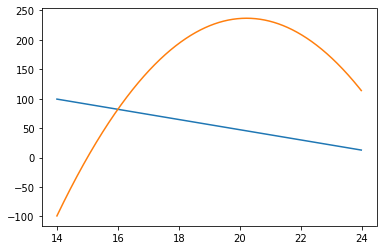

In [84]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [85]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [86]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
622,20.22,45.283449,236.379605


## Conclusion

This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.